In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
column_names = ['MovieID', 'Title', 'Genres']
Movies = pd.read_csv('movies.dat', sep='::', names=['MovieNo','Title', 'Genres'], engine='python', encoding='latin1')
Movies.dropna(inplace=True)
Movies.head()

,MovieNo,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
Ratings = pd.read_csv('ratings.dat',  sep='::', names= ['MovieID','Rating', 'Timestamp' ], engine='python', encoding='latin1')
Ratings.dropna(inplace=True)
Ratings.head()

,MovieID,Rating,Timestamp
1,1193,5.0,978300760.0
1,661,3.0,978302109.0
1,914,3.0,978301968.0
1,3408,4.0,978300275.0
1,2355,5.0,978824291.0


In [7]:
Users = pd.read_csv('users.dat', sep='::', names=['UserId', 'Sex', 'Age', 'Occupation', 'Zip-code'], engine='python', encoding='latin1')
Users.dropna(inplace=True)
Users.head()

,UserId,Sex,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
Ratings = pd.DataFrame(Ratings)
Users = pd.DataFrame(Users)
User_ratings = Users.merge(Ratings, left_on='UserId', right_on='MovieID')
User_ratings

,UserId,Sex,Age,Occupation,Zip-code,MovieID,Rating,Timestamp
0,1,F,1,10,48067,1,5.0,9.788243e+08
1,1,F,1,10,48067,1,4.0,9.782370e+08
2,1,F,1,10,48067,1,4.0,9.782335e+08
3,1,F,1,10,48067,1,5.0,9.782260e+08
4,1,F,1,10,48067,1,5.0,9.782265e+08
...,...,...,...,...,...,...,...,...
599607,3952,F,45,1,12449,3952,3.0,1.001716e+09
599608,3952,F,45,1,12449,3952,3.0,1.027633e+09
599609,3952,F,45,1,12449,3952,5.0,1.002394e+09
599610,3952,F,45,1,12449,3952,4.0,9.921742e+08


In [9]:
Movies = pd.DataFrame(Movies)
Master_data = User_ratings.merge(Movies, left_on='MovieID', right_on='MovieNo')
Master_data

,UserId,Sex,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,MovieNo,Title,Genres
0,1,F,1,10,48067,1,5.0,9.788243e+08,1,Toy Story (1995),Animation|Children's|Comedy
1,1,F,1,10,48067,1,4.0,9.782370e+08,1,Toy Story (1995),Animation|Children's|Comedy
2,1,F,1,10,48067,1,4.0,9.782335e+08,1,Toy Story (1995),Animation|Children's|Comedy
3,1,F,1,10,48067,1,5.0,9.782260e+08,1,Toy Story (1995),Animation|Children's|Comedy
4,1,F,1,10,48067,1,5.0,9.782265e+08,1,Toy Story (1995),Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...,...
599607,3952,F,45,1,12449,3952,3.0,1.001716e+09,3952,"Contender, The (2000)",Drama|Thriller
599608,3952,F,45,1,12449,3952,3.0,1.027633e+09,3952,"Contender, The (2000)",Drama|Thriller
599609,3952,F,45,1,12449,3952,5.0,1.002394e+09,3952,"Contender, The (2000)",Drama|Thriller
599610,3952,F,45,1,12449,3952,4.0,9.921742e+08,3952,"Contender, The (2000)",Drama|Thriller


In [10]:
Master_data.describe()

,UserId,Age,Occupation,MovieID,Rating,Timestamp,MovieNo
count,599612.000000,599612.000000,599612.000000,599612.000000,599612.000000,5.996120e+05,599612.000000
mean,1877.484758,30.457271,8.188812,1877.484758,3.573586,9.767090e+08,1877.484758
std,1106.992629,13.271493,6.276171,1106.992629,1.120189,1.067507e+07,1106.992629
min,1.000000,1.000000,0.000000,1.000000,1.000000,9.664568e+08,1.000000
25%,1030.000000,25.000000,3.000000,1030.000000,3.000000,9.737810e+08,1030.000000
50%,1870.000000,25.000000,7.000000,1870.000000,4.000000,9.747834e+08,1870.000000
75%,2792.000000,35.000000,14.000000,2792.000000,4.000000,9.762074e+08,2792.000000
max,3952.000000,56.000000,20.000000,3952.000000,5.000000,1.046393e+09,3952.000000


In [11]:
Master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599612 entries, 0 to 599611
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   UserId      599612 non-null  int64  
 1   Sex         599612 non-null  object 
 2   Age         599612 non-null  int64  
 3   Occupation  599612 non-null  int64  
 4   Zip-code    599612 non-null  object 
 5   MovieID     599612 non-null  int64  
 6   Rating      599612 non-null  float64
 7   Timestamp   599612 non-null  float64
 8   MovieNo     599612 non-null  int64  
 9   Title       599612 non-null  object 
 10  Genres      599612 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 54.9+ MB


In [12]:
highly_rated_movies = Master_data[Master_data['Rating'] == 5]
print(highly_rated_movies)

        UserId Sex  Age  Occupation Zip-code  MovieID  Rating     Timestamp  \
0            1   F    1          10    48067        1     5.0  9.788243e+08   
3            1   F    1          10    48067        1     5.0  9.782260e+08   
4            1   F    1          10    48067        1     5.0  9.782265e+08   
6            1   F    1          10    48067        1     5.0  9.785560e+08   
11           1   F    1          10    48067        1     5.0  9.781030e+08   
...        ...  ..  ...         ...      ...      ...     ...           ...   
599585    3952   F   45           1    12449     3952     5.0  1.009394e+09   
599600    3952   F   45           1    12449     3952     5.0  1.031069e+09   
599602    3952   F   45           1    12449     3952     5.0  9.867836e+08   
599605    3952   F   45           1    12449     3952     5.0  9.863253e+08   
599609    3952   F   45           1    12449     3952     5.0  1.002394e+09   

        MovieNo                  Title             

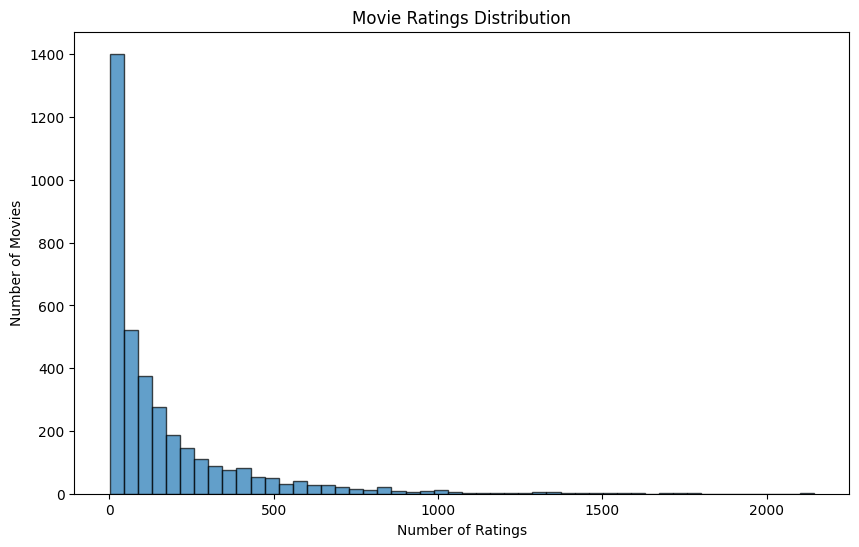

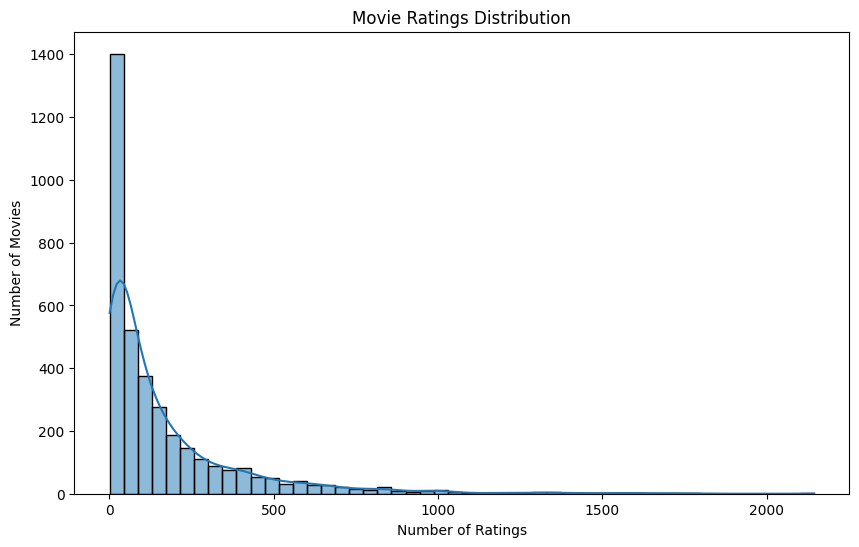

In [13]:
ratings_count = Master_data.groupby('MovieID')['Rating'].count()


plt.figure(figsize=(10, 6))
plt.hist(ratings_count, bins=50, edgecolor='k', alpha=0.7)
plt.title('Movie Ratings Distribution')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(ratings_count, bins=50, kde=True)
plt.title('Movie Ratings Distribution')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()

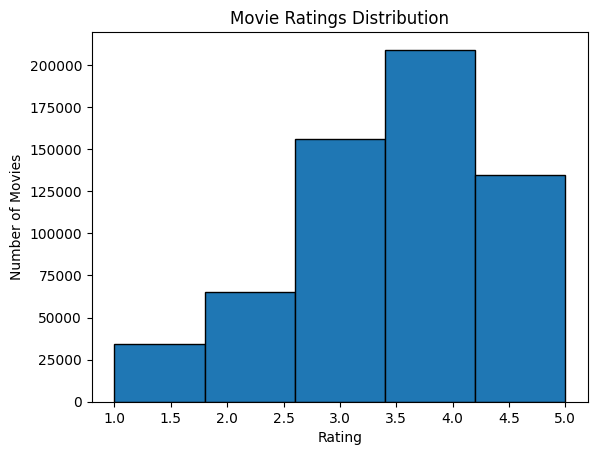

In [14]:
plt.hist(Master_data['Rating'], bins=5, range=(1, 5), edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.title('Movie Ratings Distribution')
plt.show()

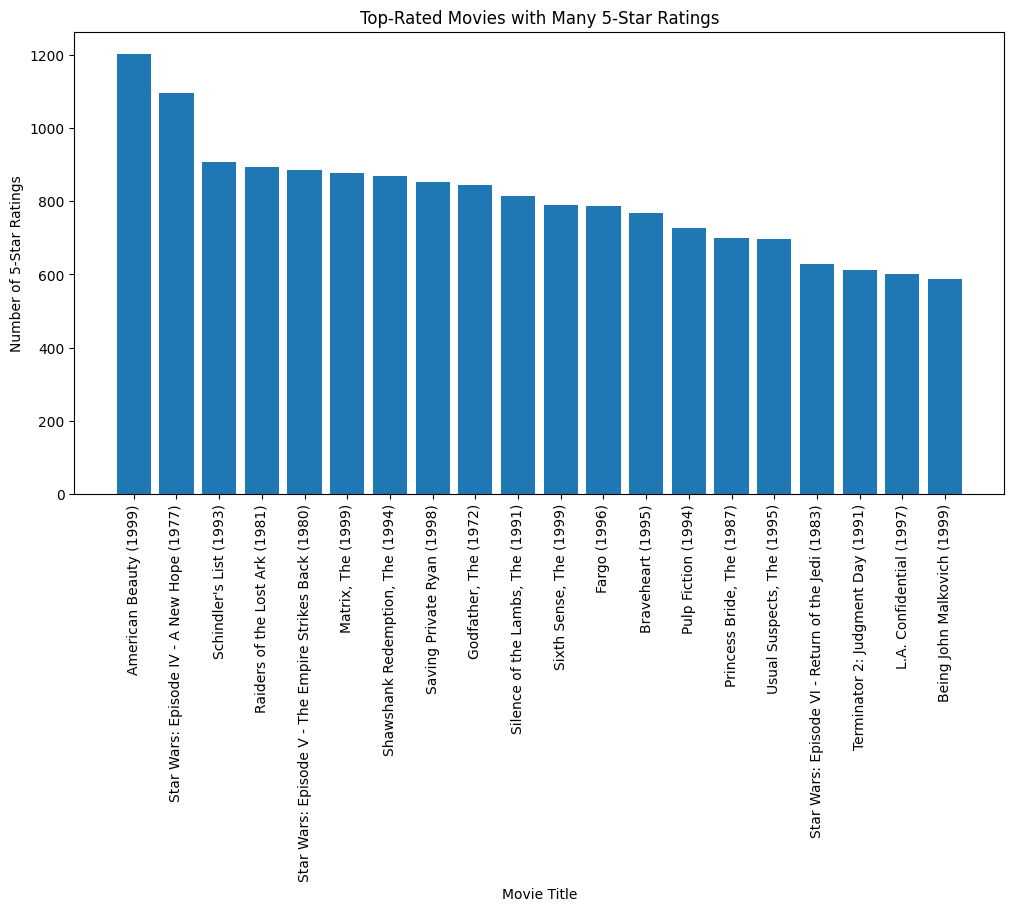

In [15]:
movie_ratings = Master_data[Master_data['Rating'] == 5].groupby('Title')['Rating'].count().reset_index()
top_rated_movies = movie_ratings.sort_values(by='Rating', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(top_rated_movies['Title'][:20], top_rated_movies['Rating'][:20])
plt.xlabel('Movie Title')
plt.ylabel('Number of 5-Star Ratings')
plt.title('Top-Rated Movies with Many 5-Star Ratings')
plt.xticks(rotation=90)
plt.show()

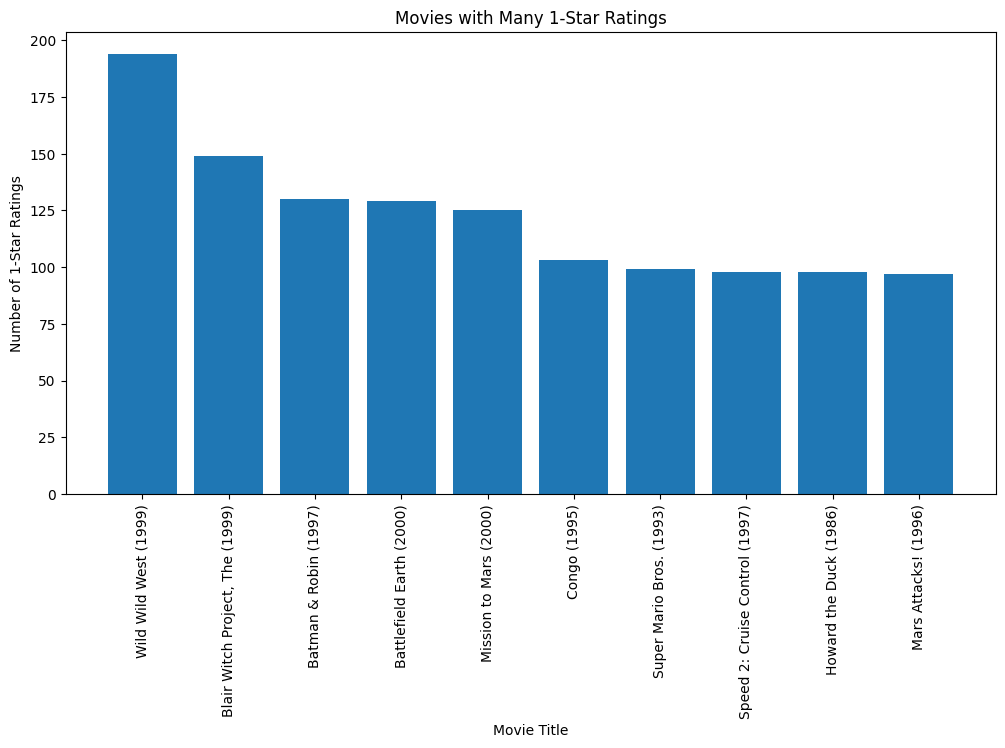

In [16]:
low_rated_movies = Master_data[Master_data['Rating'] == 1]
movie_ratings_count = low_rated_movies['Title'].value_counts().reset_index()
movie_ratings_count.columns = ['Title', 'Number of 1-Star Ratings']
top_low_rated_movies = movie_ratings_count.sort_values(by='Number of 1-Star Ratings', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(top_low_rated_movies['Title'][:10], top_low_rated_movies['Number of 1-Star Ratings'][:10])
plt.xlabel('Movie Title')
plt.ylabel('Number of 1-Star Ratings')
plt.title('Movies with Many 1-Star Ratings')
plt.xticks(rotation=90)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = Master_data[['Age', 'Occupation']]
y = Master_data['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

new_data = np.array([[30, 10]])
predicted_rating = model.predict(new_data)
print(f"Predicted Rating: {predicted_rating[0]:.2f}")

Mean Squared Error (MSE): 1.26
Root Mean Squared Error (RMSE): 1.12
R-squared (R2) Score: 0.00
Predicted Rating: 3.57


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load your data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(Master_data[['UserId', 'MovieID', 'Rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Use the SVD algorithm (you can try other algorithms as well)
model = SVD()
model.fit(trainset)

# Make predictions on the test set
predictions = model.test(testset)

# Evaluate the model
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse:.2f}")

# Now, you can make recommendations for a specific user
user_id = 1
movies_rated_by_user = Master_data[Master_data['UserId'] == user_id]['MovieID']
movies_not_rated_by_user = Master_data[~Master_data['MovieID'].isin(movies_rated_by_user)]
movies_to_recommend = movies_not_rated_by_user['MovieID'].unique()

user_predictions = [model.predict(user_id, movie_id) for movie_id in movies_to_recommend]

sorted_predictions = sorted(user_predictions, key=lambda x: x.est, reverse=True)
top_n = 10

recommended_movies = set()
top_movie_titles = []

for prediction in sorted_predictions:
    if len(recommended_movies) >= top_n:
        break
    if prediction.iid not in recommended_movies:
        recommended_movies.add(prediction.iid)
        top_movie_titles.append(Master_data[Master_data['MovieID'] == prediction.iid]['Title'].values[0])

print(f"Top {top_n} Movie Recommendations for User {user_id}:\n")
for i, title in enumerate(top_movie_titles):
    print(f"{i + 1}. {title}")


RMSE: 0.9814
RMSE: 0.98
Top 10 Movie Recommendations for User 1:

1. Star Wars: Episode IV - A New Hope (1977)
2. Shawshank Redemption, The (1994)
3. Usual Suspects, The (1995)
4. Godfather, The (1972)
5. Schindler's List (1993)
6. Raiders of the Lost Ark (1981)
7. Saving Private Ryan (1998)
8. Sixth Sense, The (1999)
9. Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)
10. Rear Window (1954)
